<a href="https://colab.research.google.com/github/heyitzrizki/final-project-ds49-group3/blob/main/eda%20%26%20preprocessing/eda_%26_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Connect to GitHub

## 0.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import pprint
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from datetime import datetime
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 0.2 Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/heyitzrizki/final-project-ds49-group3/refs/heads/main/data/dataset.csv'
df = pd.read_csv(url)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [4]:
#Change format object to date_time

df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['market_id'] = df['market_id'].astype('object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  object        
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

# 1. Exploratory Data Analysis

## 1.1 Check Null Values

In [6]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [7]:
# Percentage of missing value for each column
missing_percent = df.isnull().sum()/df.shape[0]*100
missing_percent

,0
market_id,0.499929
created_at,0.000000
actual_delivery_time,0.003546
store_id,0.000000
store_primary_category,2.411006
order_protocol,0.503981
total_items,0.000000
subtotal,0.000000
num_distinct_items,0.000000
min_item_price,0.000000


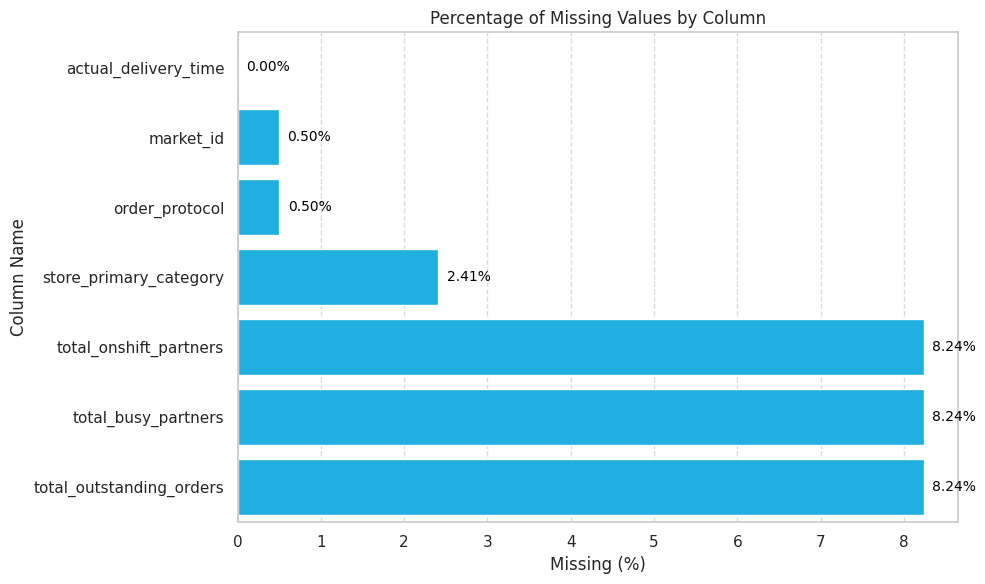

In [8]:
# Create new DataFrame for plot
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=True)
missing_df = pd.DataFrame({'column_name': missing_percent.index, 'missing (%)': missing_percent.values})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='missing (%)', y='column_name', data=missing_df, color='deepskyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Missing (%)')
plt.ylabel('Column Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(missing_df['missing (%)']):
    plt.text(
        value + 0.1,
        index,
        f"{value:.2f}%",
        va='center',
        fontsize=10,
        color='black'
    )
plt.tight_layout()
plt.show()

## 1.2 Check Duplicate Data

In [9]:
df_duplicate = df.copy()

In [10]:
df.duplicated().sum()

np.int64(0)

There are no DUPLICATED DATA

## 1.3 Check Unique Values

### 1.3.1 Check Data Shape

In [11]:
df.shape

(197428, 14)

### 1.3.2 Check Data Type

In [12]:
df.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64


### 1.3.3 Check Data Stats

In [13]:
df.describe()

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,197428,197421,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
min,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2015-01-29 02:32:42,2015-01-29 03:22:29,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000
std,NaN,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830


1. min of min_item_price is -86? Impossible.
2. min value of total_onshift_partners, total_busy_partners, and total_outstanding_orders are negative? Does not make sense.

# 2. Data Preprocessing

### 2.1. Data Cleaning

#### 2.1.1. Handling the negative values

In [14]:
# Identify the Rows with Any Negative Value
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Filter rows where any numerical column has a negative value
negative_rows = df[(df[numerical_cols] < 0).any(axis=1)]

# Display those rows
negative_rows.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
790,1.0,2015-01-29 02:59:28,2015-01-29 03:44:09,c56a4706337730e0e15da875405fa1c5,fast,4.0,3,1003,3,-86,1066,24.0,29.0,38.0
1351,2.0,2015-02-06 05:26:55,2015-02-06 06:15:41,f806c5d2707545d718717be03e69a8d4,fast,4.0,35,1786,4,-1,488,33.0,36.0,52.0
4989,1.0,2015-02-18 00:36:21,2015-02-18 01:12:28,f937c8fddbe66ab03c563f16d5cfa50c,smoothie,2.0,2,1940,1,840,856,11.0,14.0,-2.0
6034,3.0,2015-02-14 01:48:58,2015-02-14 03:00:13,5faa4ad014bbddf9ae4006a0f03085e0,american,1.0,2,3538,2,1238,1606,-2.0,2.0,10.0
7997,1.0,2015-02-08 15:41:45,2015-02-08 16:35:01,226d1f15ecd35f784d2a20c3ecf56d7f,sandwich,3.0,1,1514,1,1116,1063,1.0,-1.0,3.0


In [15]:
# Logic-based invalid value detection
invalid_condition = (
    (df['min_item_price'] < 0) |
    (df['total_onshift_partners'] < 0) |
    (df['total_busy_partners'] < 0) |
    (df['total_outstanding_orders'] < 0)
)

# Drop or replace with NaN
df.loc[invalid_condition, ['min_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']] = np.nan


#### 2.1.2. Check the distribution

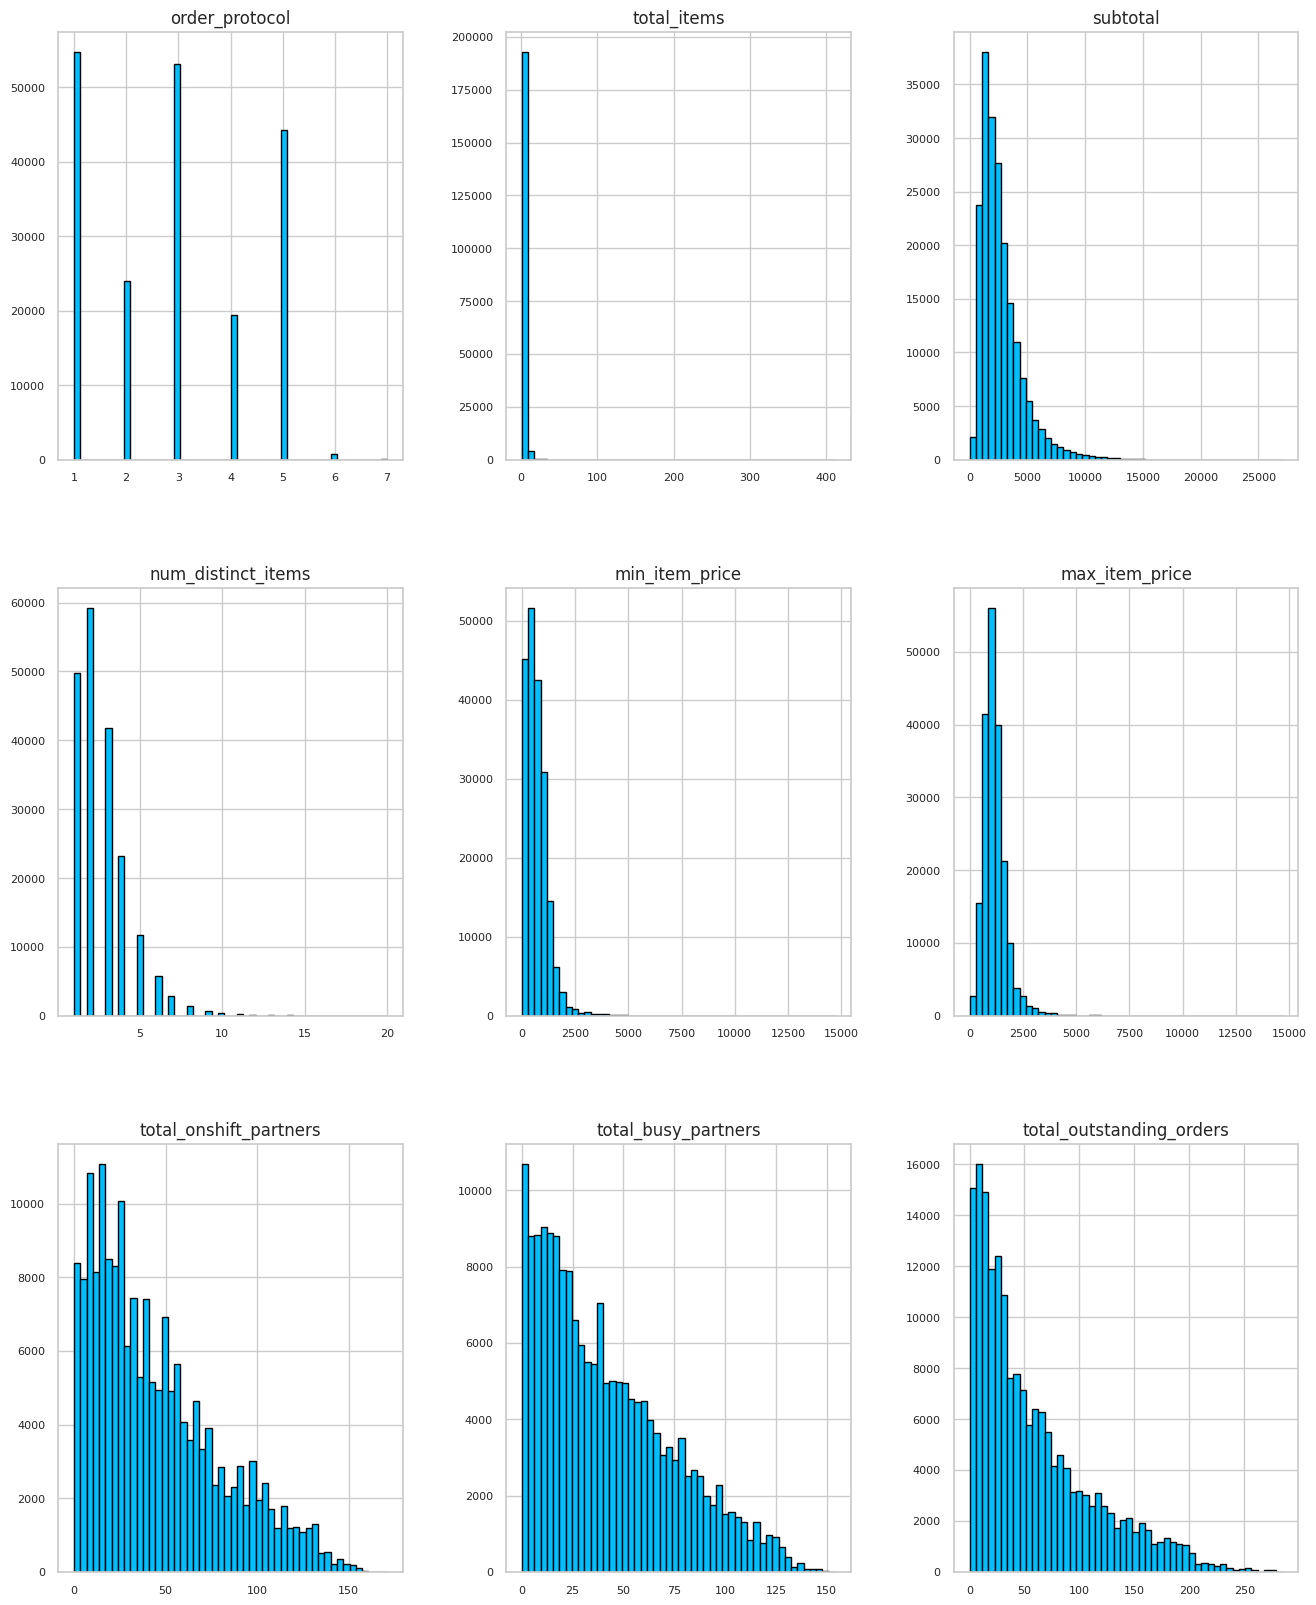

In [16]:
df_num = df.select_dtypes(exclude=["object", "datetime64[ns]"])

fig_ = df_num.hist(
    figsize=(16, 20),
    bins=50,
    color="deepskyblue",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8
)

In [17]:
df['total_busy_partners'].skew()

np.float64(0.7821394529428061)

right skewed

#### 2.1.3. Handling outliers

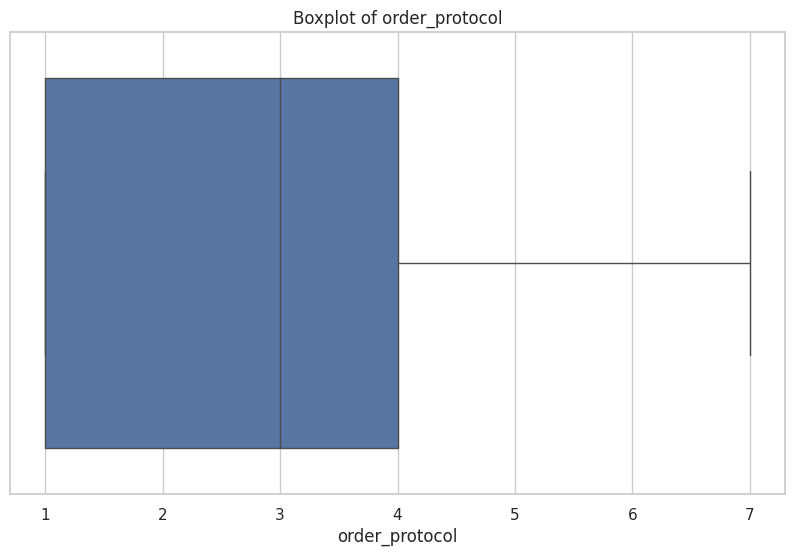

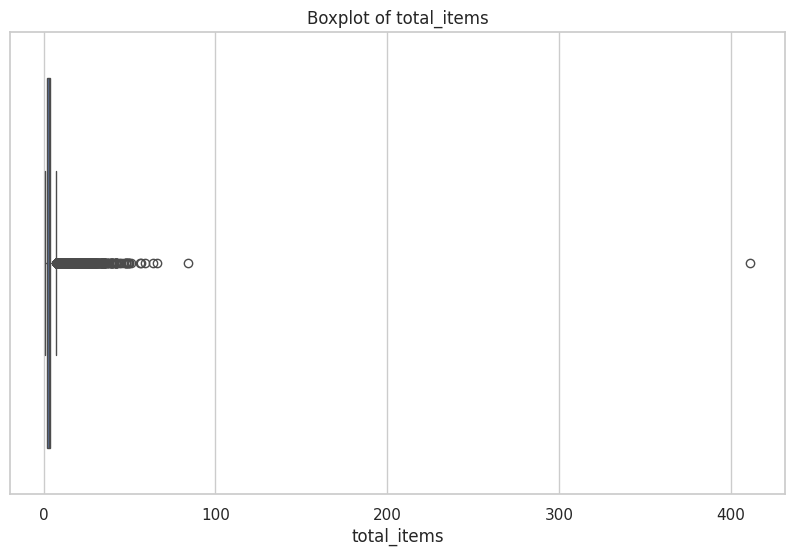

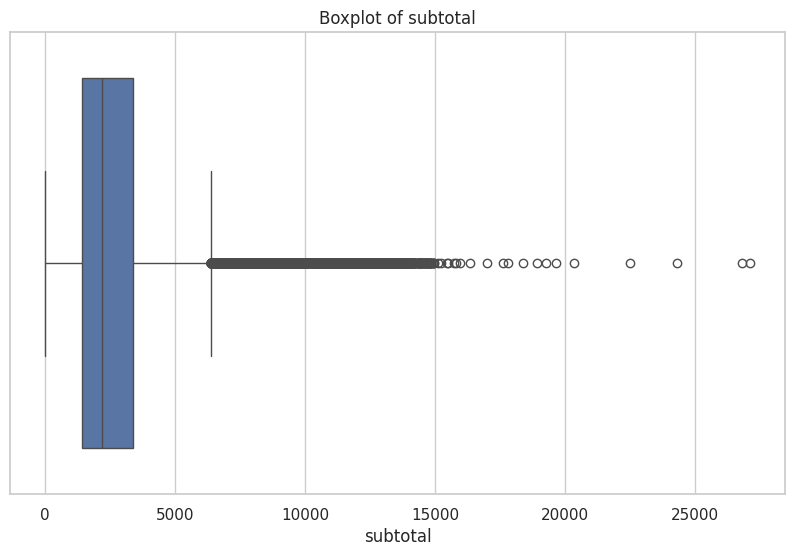

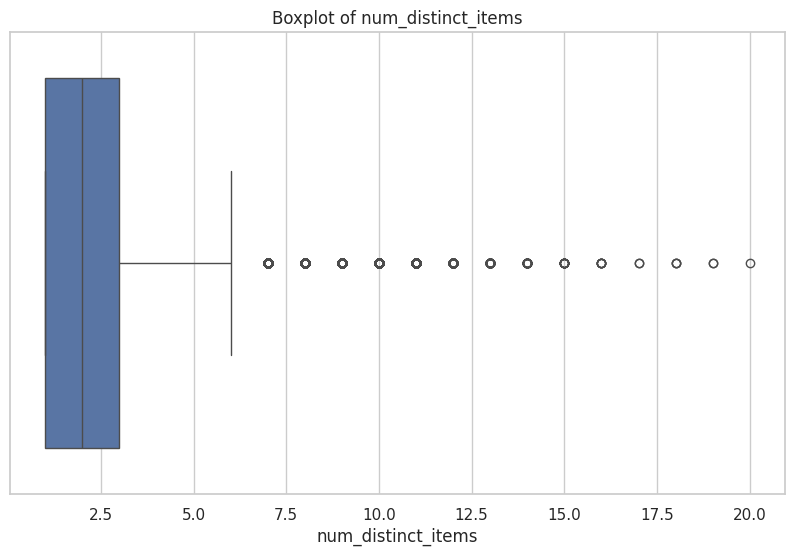

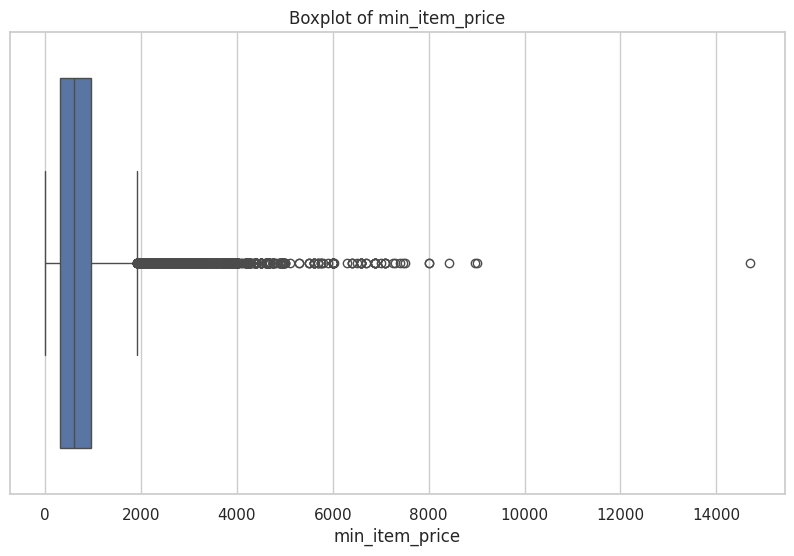

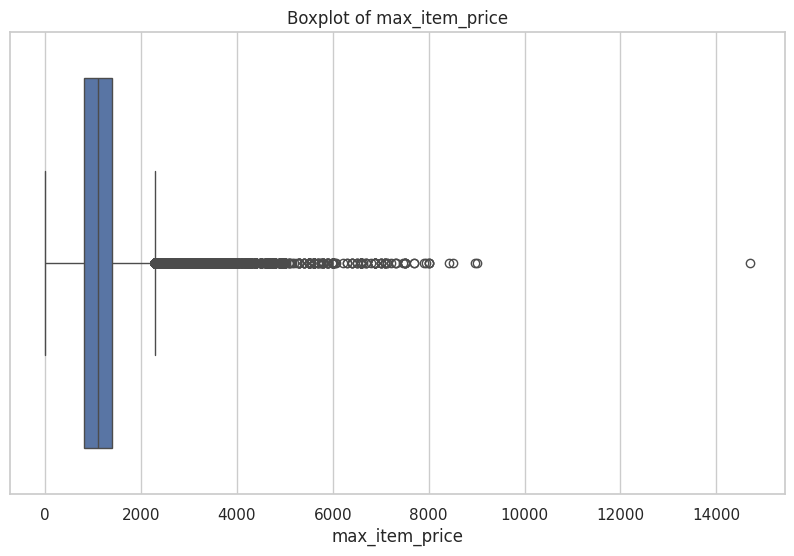

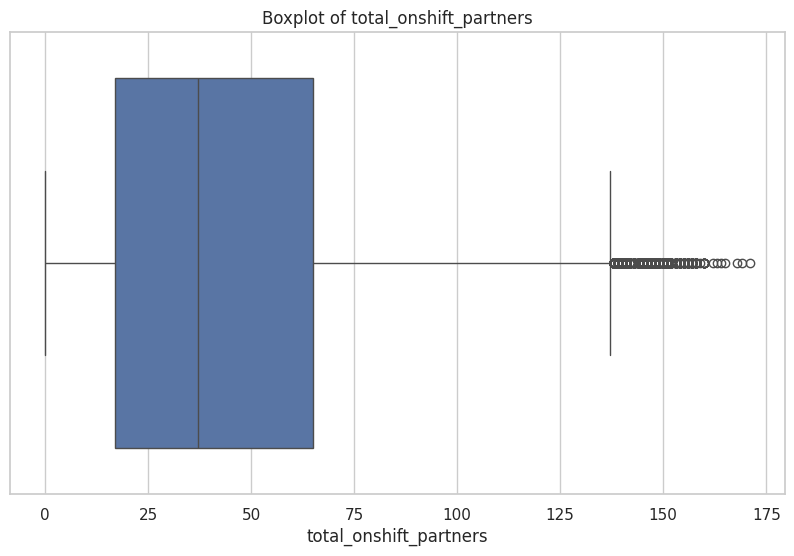

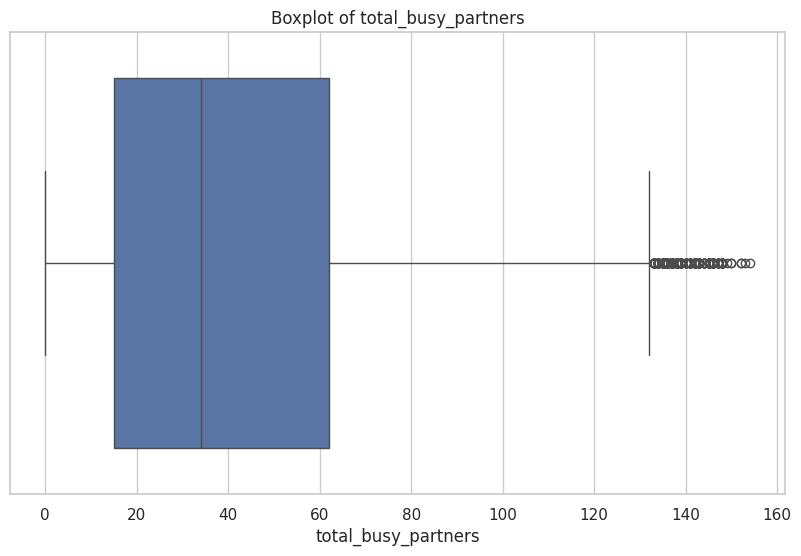

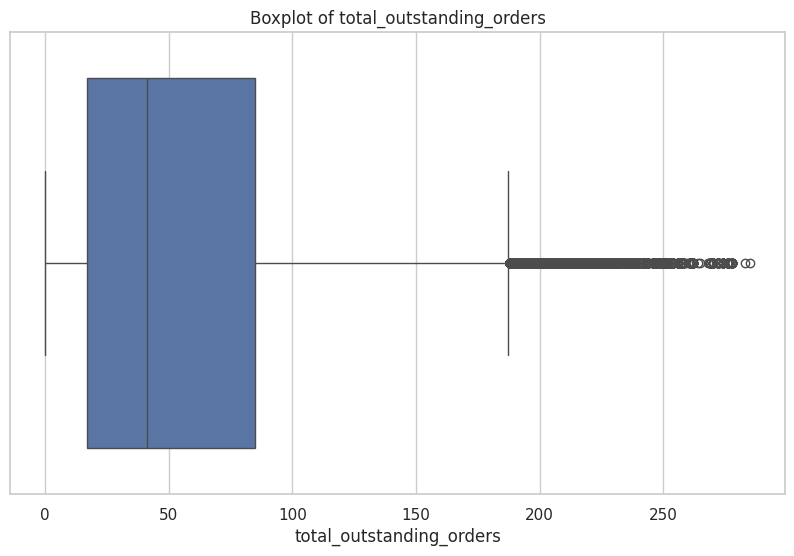

In [18]:
# Boxplot visualization for each numerical feature
for column in df_num.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df_num[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

Eksperimen 2 skenario:

1. df_no_outlier_all → semua outlier dibuang (agresif)

2. df_no_outlier_partial → hanya sebagian (top extreme) outlier dibuang (moderat)

In [19]:
df_cleaned = df.copy()

In [20]:
cols_outlier_check = ['total_items', 'subtotal', 'num_distinct_items',
                      'min_item_price', 'max_item_price',
                      'total_onshift_partners', 'total_busy_partners',
                      'total_outstanding_orders']

In [21]:
# Remove all outliers with IQR

def remove_all_outliers_iqr(df, cols):
  for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
  return df

# Remove top outliers (1%)
def remove_top_percent_outliers(df, cols, percent=0.01):
    for col in cols:
        threshold = df[col].quantile(1 - percent)
        df = df[df[col] <= threshold]
    return df

# Dataset without outliers
df_no_outlier_all = remove_all_outliers_iqr(df_cleaned.copy(), cols_outlier_check)
df_no_outlier_partial = remove_top_percent_outliers(df_cleaned.copy(), cols_outlier_check, percent = 0.01)

print("Original cleaned:", df_cleaned.shape)
print("No outliers (all):", df_no_outlier_all.shape)
print("Partial outliers removed:", df_no_outlier_partial.shape)

Original cleaned: (197428, 14)
No outliers (all): (150015, 14)
Partial outliers removed: (167918, 14)


#### 2.1.4. Handling missing values

In [22]:
print("All outlier removed:")
print(df_no_outlier_all.isnull().sum())

print("\nPartial outlier removed:")
print(df_no_outlier_partial.isnull().sum())

All outlier removed:
market_id                    777
created_at                     0
actual_delivery_time           5
store_id                       0
store_primary_category      3422
order_protocol               775
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 0
total_onshift_partners         0
total_busy_partners            0
total_outstanding_orders       0
dtype: int64

Partial outlier removed:
market_id                    858
created_at                     0
actual_delivery_time           7
store_id                       0
store_primary_category      3860
order_protocol               865
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 0
total_onshift_partners         0
total_busy_partners            0
total_outstanding_orders       0
dtype: int64


In [23]:
# Drop rows with missing target
df_no_outlier_all = df_no_outlier_all.dropna(subset=['actual_delivery_time'])
df_no_outlier_partial = df_no_outlier_partial.dropna(subset=['actual_delivery_time'])

# Fill 'store_primary_category' missing with 'Other'
df_no_outlier_all['store_primary_category'].fillna('Other', inplace=True)
df_no_outlier_partial['store_primary_category'].fillna('Other', inplace=True)

# Fill 'order_protocol' missing with 'unknown'
df_no_outlier_all['order_protocol'].fillna('Unknown', inplace=True)
df_no_outlier_partial['order_protocol'].fillna('Unknown', inplace=True)

In [24]:
print(df_no_outlier_all.isnull().sum())
print(df_no_outlier_partial.isnull().sum())

market_id                   777
created_at                    0
actual_delivery_time          0
store_id                      0
store_primary_category        0
order_protocol                0
total_items                   0
subtotal                      0
num_distinct_items            0
min_item_price                0
max_item_price                0
total_onshift_partners        0
total_busy_partners           0
total_outstanding_orders      0
dtype: int64
market_id                   858
created_at                    0
actual_delivery_time          0
store_id                      0
store_primary_category        0
order_protocol                0
total_items                   0
subtotal                      0
num_distinct_items            0
min_item_price                0
max_item_price                0
total_onshift_partners        0
total_busy_partners           0
total_outstanding_orders      0
dtype: int64


we are not using market_id for further analysis so we left it unchanged.

In [25]:
df_no_outlier_all.describe()

,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,150010,150010,150010.000000,150010.000000,150010.000000,150010.000000,150010.000000,150010.00000,150010.000000,150010.000000
mean,2015-02-04 18:28:14.978801408,2015-02-04 19:14:36.160495872,2.732058,2261.596620,2.406280,652.817545,1054.650003,40.15043,37.554090,50.157396
min,2015-01-21 15:22:03,2015-01-21 15:58:11,1.000000,0.000000,1.000000,0.000000,60.000000,0.00000,0.000000,0.000000
25%,2015-01-29 00:14:52.500000,2015-01-29 00:58:08.750000128,2.000000,1318.000000,1.000000,300.000000,795.000000,16.00000,14.000000,16.000000
50%,2015-02-05 01:31:25.500000,2015-02-05 02:23:16,2.000000,2000.000000,2.000000,599.000000,1005.000000,33.00000,31.000000,37.000000
75%,2015-02-11 22:23:47,2015-02-11 23:01:36.750000128,4.000000,2985.000000,3.000000,908.000000,1298.000000,59.00000,57.000000,75.000000
max,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,5992.000000,6.000000,1947.000000,2076.000000,134.00000,127.000000,176.000000
std,NaN,NaN,1.459181,1192.417822,1.223071,405.684922,374.687437,30.01418,28.259387,43.049035


In [26]:
df_no_outlier_partial.describe()

,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,167911,167911,167911.000000,167911.000000,167911.000000,167911.000000,167911.000000,167911.000000,167911.000000,167911.000000
mean,2015-02-04 19:02:34.057899776,2015-02-04 19:49:42.122957824,2.974701,2505.057596,2.553371,665.152003,1107.599454,42.320473,39.488580,53.938199
min,2015-01-21 15:22:03,2015-01-21 15:58:11,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-01-29 01:23:37,2015-01-29 02:09:46,2.000000,1390.000000,1.000000,300.000000,799.000000,17.000000,15.000000,17.000000
50%,2015-02-05 01:55:17,2015-02-05 02:50:30,3.000000,2148.000000,2.000000,595.000000,1050.000000,35.000000,33.000000,39.000000
75%,2015-02-11 23:59:36.500000,2015-02-12 00:42:22,4.000000,3245.000000,3.000000,925.000000,1359.000000,62.000000,60.000000,80.000000
max,2015-02-18 06:00:44,2015-02-19 22:45:31,12.000000,8976.000000,7.000000,2500.000000,2699.000000,136.000000,124.000000,198.000000
std,NaN,NaN,1.823775,1498.041717,1.387763,440.606415,439.756221,31.855888,29.808529,47.370567


#### 2.1.5. Feature Engineering

Creating "Delivery Time" column

In [27]:
# For full-outlier-removed dataset
df_no_outlier_all['delivery_time'] = df_no_outlier_all['actual_delivery_time'] - df_no_outlier_all['created_at']

# For partial-outlier-removed dataset
df_no_outlier_partial['delivery_time'] = df_no_outlier_partial['actual_delivery_time'] - df_no_outlier_partial['created_at']

In [28]:
# Full outlier removed delivery time
df_no_outlier_all['delivery_time'] = (df_no_outlier_all['actual_delivery_time'] - df_no_outlier_all['created_at']).dt.total_seconds() / 60

# Partial outlier removed delivery time
df_no_outlier_partial['delivery_time'] = (df_no_outlier_partial['actual_delivery_time'] - df_no_outlier_partial['created_at']).dt.total_seconds() / 60


In [29]:
print("All removed - Negative or zero delivery time:", (df_no_outlier_all['delivery_time'] <= 0).sum())
print("Partial removed - Negative or zero delivery time:", (df_no_outlier_partial['delivery_time'] <= 0).sum())

All removed - Negative or zero delivery time: 0
Partial removed - Negative or zero delivery time: 0


In [30]:
df_no_outlier_all.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557.0,1239,33.0,14.0,21.0,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400.0,1400,1.0,2.0,2.0,67.066667
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Other,1.0,1,1900,1,1900.0,1900,1.0,0.0,0.0,29.683333
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,Other,1.0,3,3900,3,1100.0,1600,6.0,6.0,9.0,39.833333
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Other,1.0,3,5000,3,1500.0,1900,2.0,2.0,2.0,38.333333


In [31]:
df_no_outlier_partial.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557.0,1239,33.0,14.0,21.0,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400.0,1400,1.0,2.0,2.0,67.066667
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Other,1.0,1,1900,1,1900.0,1900,1.0,0.0,0.0,29.683333
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,Other,1.0,6,6900,5,600.0,1800,1.0,1.0,2.0,51.250000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,Other,1.0,3,3900,3,1100.0,1600,6.0,6.0,9.0,39.833333


In [32]:
# Because column of ("Created_at" and "actual_delivery_time") was not used (temporary), they can be dropped

cols_to_drop = ['market_id', 'created_at', 'actual_delivery_time', 'store_id']

df_no_outlier_all.drop(columns=cols_to_drop, inplace=True)
df_no_outlier_partial.drop(columns=cols_to_drop, inplace=True)


In [46]:
df_no_outlier_all.head()

,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,american,1.0,4,3441,4,557.0,1239,33.0,14.0,21.0,62.983333
1,mexican,2.0,1,1900,1,1400.0,1400,1.0,2.0,2.0,67.066667
2,Other,1.0,1,1900,1,1900.0,1900,1.0,0.0,0.0,29.683333
4,Other,1.0,3,3900,3,1100.0,1600,6.0,6.0,9.0,39.833333
5,Other,1.0,3,5000,3,1500.0,1900,2.0,2.0,2.0,38.333333


In [48]:
df_no_outlier_partial.dtypes

,0
store_primary_category,object
order_protocol,object
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,float64
max_item_price,int64
total_onshift_partners,float64
total_busy_partners,float64
total_outstanding_orders,float64


In [47]:
df_no_outlier_partial.head()

,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,american,1.0,4,3441,4,557.0,1239,33.0,14.0,21.0,62.983333
1,mexican,2.0,1,1900,1,1400.0,1400,1.0,2.0,2.0,67.066667
2,Other,1.0,1,1900,1,1900.0,1900,1.0,0.0,0.0,29.683333
3,Other,1.0,6,6900,5,600.0,1800,1.0,1.0,2.0,51.250000
4,Other,1.0,3,3900,3,1100.0,1600,6.0,6.0,9.0,39.833333


In [50]:
df_no_outlier_partial.dtypes

,0
store_primary_category,object
order_protocol,object
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,float64
max_item_price,int64
total_onshift_partners,float64
total_busy_partners,float64
total_outstanding_orders,float64


In [33]:
df_no_outlier_all.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
count,150010.000000,150010.000000,150010.000000,150010.000000,150010.000000,150010.00000,150010.000000,150010.000000,150010.000000
mean,2.732058,2261.596620,2.406280,652.817545,1054.650003,40.15043,37.554090,50.157396,46.353028
std,1.459181,1192.417822,1.223071,405.684922,374.687437,30.01418,28.259387,43.049035,28.641280
min,1.000000,0.000000,1.000000,0.000000,60.000000,0.00000,0.000000,0.000000,1.683333
25%,2.000000,1318.000000,1.000000,300.000000,795.000000,16.00000,14.000000,16.000000,34.066667
50%,2.000000,2000.000000,2.000000,599.000000,1005.000000,33.00000,31.000000,37.000000,42.900000
75%,4.000000,2985.000000,3.000000,908.000000,1298.000000,59.00000,57.000000,75.000000,54.433333
max,7.000000,5992.000000,6.000000,1947.000000,2076.000000,134.00000,127.000000,176.000000,6231.316667


In [34]:
df_no_outlier_partial.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
count,167911.000000,167911.000000,167911.000000,167911.000000,167911.000000,167911.000000,167911.000000,167911.000000,167911.000000
mean,2.974701,2505.057596,2.553371,665.152003,1107.599454,42.320473,39.488580,53.938199,47.134418
std,1.823775,1498.041717,1.387763,440.606415,439.756221,31.855888,29.808529,47.370567,27.911507
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.683333
25%,2.000000,1390.000000,1.000000,300.000000,799.000000,17.000000,15.000000,17.000000,34.633333
50%,3.000000,2148.000000,2.000000,595.000000,1050.000000,35.000000,33.000000,39.000000,43.700000
75%,4.000000,3245.000000,3.000000,925.000000,1359.000000,62.000000,60.000000,80.000000,55.483333
max,12.000000,8976.000000,7.000000,2500.000000,2699.000000,136.000000,124.000000,198.000000,6231.316667


Average delivery time = 46.35 minutes for df_no_outlier_all and 47.13 for df_no_outlier_partial.

Median delivery time = 42.90 minutes for df_no_outlier_all and 43.70 for df_no_outlier_partial

### 2.2. Explore Numerical Features (Quasi-Constant Check)

In [35]:
def get_quasi_constant_features(df, threshold=0.02):
    df_num = df.select_dtypes(exclude=["object"])
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(df_num.drop(columns=['delivery_time']))
    selected_feature_names = df_num.columns[selector.get_support(indices=True)].tolist()

    print(f"Retained features ({len(selected_feature_names)}):")
    pprint.pprint(selected_feature_names)
    print(f"Quasi-constant features removed: {len(df_num.columns) - len(selected_feature_names)}")
    return selected_feature_names

# Run for both datasets
print("🔍 Quasi-constant check - Full outlier removed:")
features_all = get_quasi_constant_features(df_no_outlier_all)

print("\n🔍 Quasi-constant check - Partial outlier removed:")
features_partial = get_quasi_constant_features(df_no_outlier_partial)

🔍 Quasi-constant check - Full outlier removed:
Retained features (8):
['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']
Quasi-constant features removed: 1

🔍 Quasi-constant check - Partial outlier removed:
Retained features (8):
['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']
Quasi-constant features removed: 1


### 2.4. Correlation Heatmap

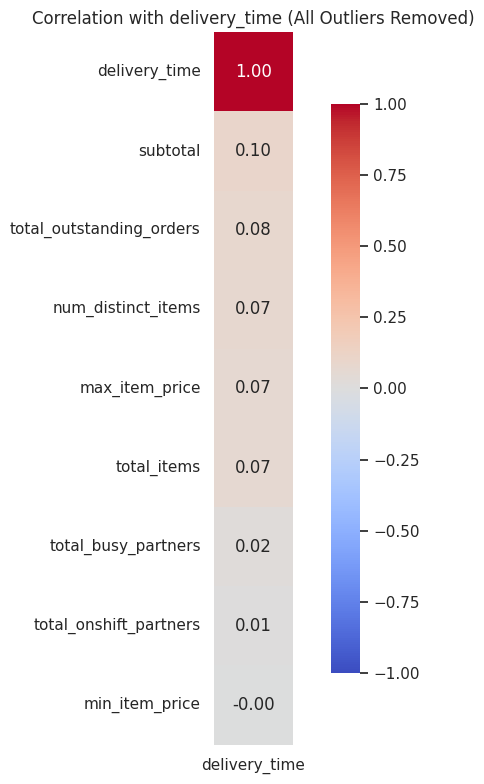

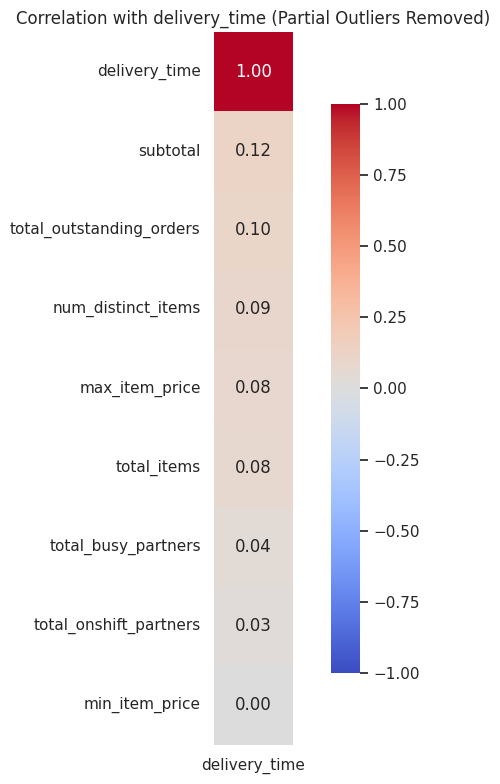

In [52]:
# Step 1: Select only numerical columns
numeric_cols_all = df_no_outlier_all.select_dtypes(include=['int64', 'float64'])
numeric_cols_partial = df_no_outlier_partial.select_dtypes(include=['int64', 'float64'])

# Step 2: Plot square correlation heatmap (only with target)
def plot_target_corr(df, target, title):
    corr_with_target = df.corr()[[target]].sort_values(by=target, ascending=False)

    plt.figure(figsize=(8, 8))
    sns.heatmap(
        corr_with_target,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        vmin=-1,
        vmax=1,
        square=True,
        cbar_kws={"shrink": 0.8}
    )
    plt.title(f'Correlation with {target} ({title})')
    plt.tight_layout()
    plt.show()

# Step 3: Run the plots
plot_target_corr(numeric_cols_all, target='delivery_time', title='All Outliers Removed')
plot_target_corr(numeric_cols_partial, target='delivery_time', title='Partial Outliers Removed')


### 2.3. Encoding categorical features (One-Hot)

In [36]:
df_no_outlier_all.dtypes

,0
store_primary_category,object
order_protocol,object
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,float64
max_item_price,int64
total_onshift_partners,float64
total_busy_partners,float64
total_outstanding_orders,float64


In [37]:
# Function: One-Hot Encode all object dtype columns
def one_hot_encode(df):
    # Identify categorical columns (type: object)
    cat_cols = df.select_dtypes(include='object').columns.tolist()

    # Perform One-Hot Encoding
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    return df_encoded

# Apply to both datasets
df_no_outlier_all_encoded = one_hot_encode(df_no_outlier_all)
df_no_outlier_partial_encoded = one_hot_encode(df_no_outlier_partial)

# Check: Make sure no object dtype remains
print("Remaining object columns (full outliers removed):", df_no_outlier_all_encoded.select_dtypes(include='object').columns.tolist())
print("Remaining object columns (partial outliers removed):", df_no_outlier_partial_encoded.select_dtypes(include='object').columns.tolist())

Remaining object columns (full outliers removed): []
Remaining object columns (partial outliers removed): []


In [38]:
df_no_outlier_all_encoded.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,store_primary_category_breakfast,store_primary_category_british,store_primary_category_bubble-tea,store_primary_category_burger,store_primary_category_burmese,store_primary_category_cafe,store_primary_category_cajun,store_primary_category_caribbean,store_primary_category_catering,store_primary_category_cheese,store_primary_category_chinese,store_primary_category_comfort-food,store_primary_category_convenience-store,store_primary_category_dessert,store_primary_category_dim-sum,store_primary_category_ethiopian,store_primary_category_european,store_primary_category_fast,store_primary_category_filipino,store_primary_category_french,store_primary_category_gastropub,store_primary_category_german,store_primary_category_gluten-free,store_primary_category_greek,store_primary_category_hawaiian,store_primary_category_indian,store_primary_category_irish,store_primary_category_italian,store_primary_category_japanese,store_primary_category_korean,store_primary_category_kosher,store_primary_category_latin-american,store_primary_category_lebanese,store_primary_category_malaysian,store_primary_category_mediterranean,store_primary_category_mexican,store_primary_category_middle-eastern,store_primary_category_moroccan,store_primary_category_nepalese,store_primary_category_other,store_primary_category_pakistani,store_primary_category_pasta,store_primary_category_persian,store_primary_category_peruvian,store_primary_category_pizza,store_primary_category_russian,store_primary_category_salad,store_primary_category_sandwich,store_primary_category_seafood,store_primary_category_singaporean,store_primary_category_smoothie,store_primary_category_soup,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,order_protocol_Unknown
0,4,3441,4,557.0,1239,33.0,14.0,21.0,62.983333,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,1900,1,1400.0,1400,1.0,2.0,2.0,67.066667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,1900,1,1900.0,1900,1.0,0.0,0.0,29.683333,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [39]:
df_no_outlier_partial_encoded.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,store_primary_category_breakfast,store_primary_category_british,store_primary_category_bubble-tea,store_primary_category_burger,store_primary_category_burmese,store_primary_category_cafe,store_primary_category_cajun,store_primary_category_caribbean,store_primary_category_catering,store_primary_category_cheese,store_primary_category_chinese,store_primary_category_comfort-food,store_primary_category_convenience-store,store_primary_category_dessert,store_primary_category_dim-sum,store_primary_category_ethiopian,store_primary_category_european,store_primary_category_fast,store_primary_category_filipino,store_primary_category_french,store_primary_category_gastropub,store_primary_category_german,store_primary_category_gluten-free,store_primary_category_greek,store_primary_category_hawaiian,store_primary_category_indian,store_primary_category_irish,store_primary_category_italian,store_primary_category_japanese,store_primary_category_korean,store_primary_category_kosher,store_primary_category_latin-american,store_primary_category_lebanese,store_primary_category_malaysian,store_primary_category_mediterranean,store_primary_category_mexican,store_primary_category_middle-eastern,store_primary_category_moroccan,store_primary_category_nepalese,store_primary_category_other,store_primary_category_pakistani,store_primary_category_pasta,store_primary_category_persian,store_primary_category_peruvian,store_primary_category_pizza,store_primary_category_russian,store_primary_category_salad,store_primary_category_sandwich,store_primary_category_seafood,store_primary_category_singaporean,store_primary_category_smoothie,store_primary_category_soup,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,order_protocol_Unknown
0,4,3441,4,557.0,1239,33.0,14.0,21.0,62.983333,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,1900,1,1400.0,1400,1.0,2.0,2.0,67.066667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,1900,1,1900.0,1900,1.0,0.0,0.0,29.683333,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

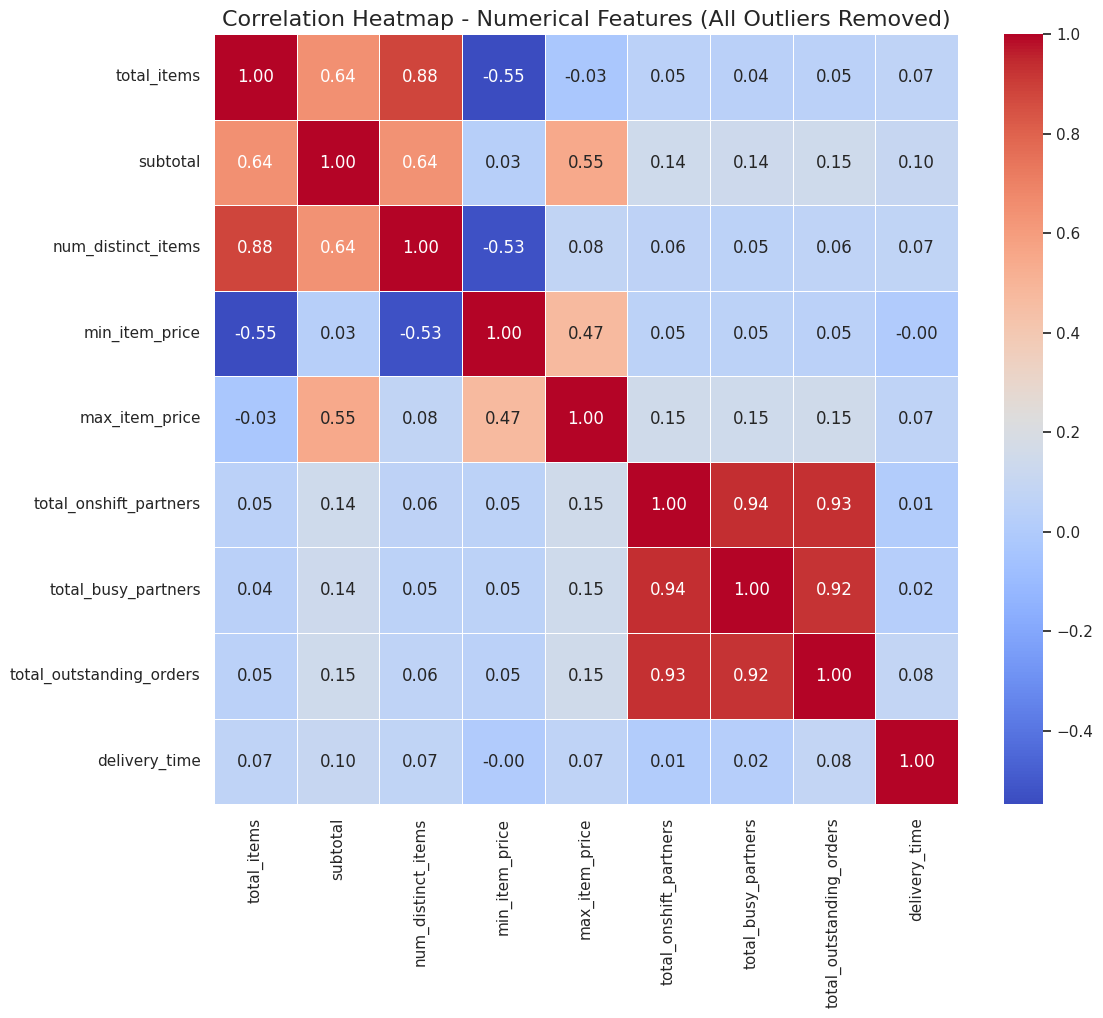

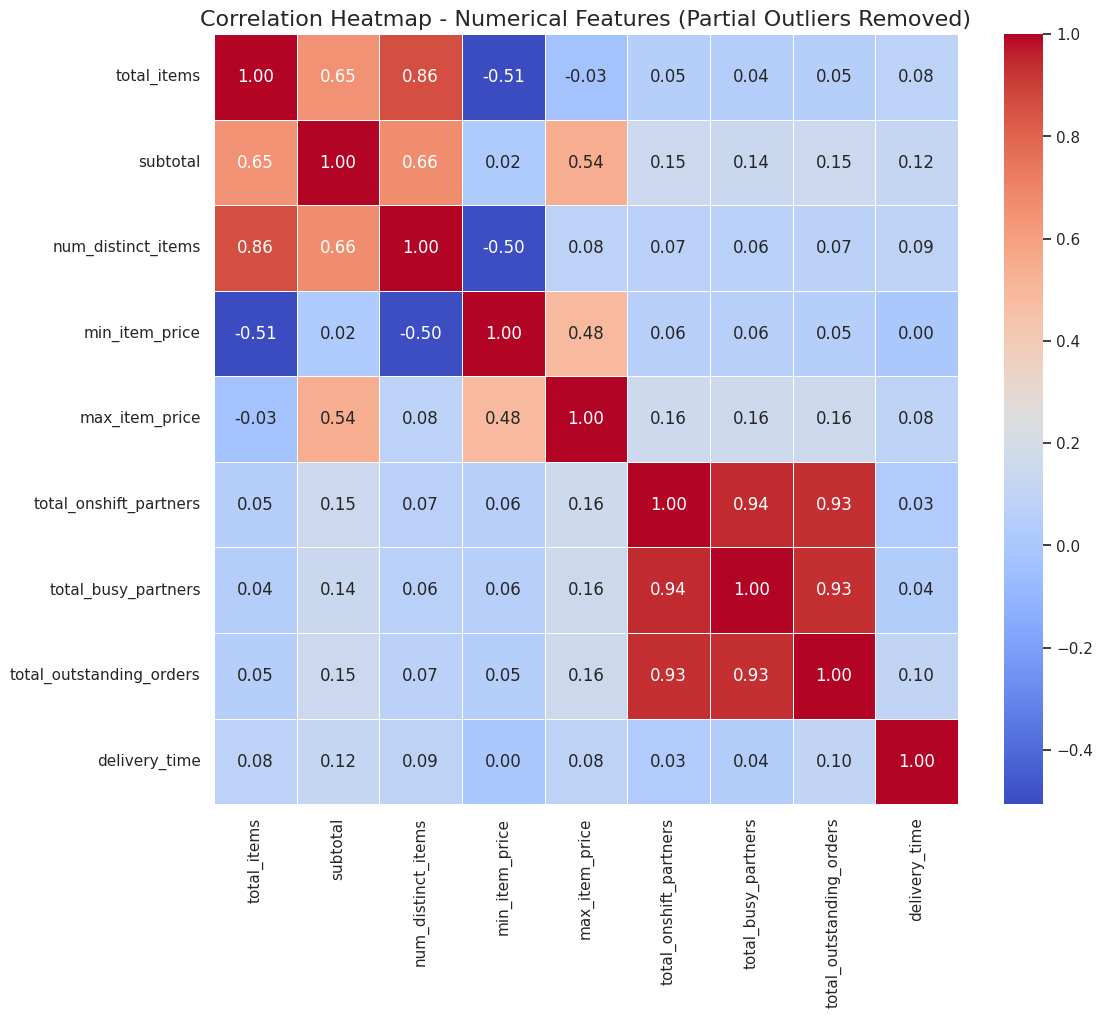

In [53]:
# Select only numerical columns for a clearer heatmap
numeric_cols_all = df_no_outlier_all.select_dtypes(include=np.number)
numeric_cols_partial = df_no_outlier_partial.select_dtypes(include=np.number)

# --- Heatmap for All Outliers Removed ---
plt.figure(figsize=(12, 10))
correlation_matrix_all_numeric = numeric_cols_all.corr()
sns.heatmap(
    correlation_matrix_all_numeric,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Heatmap - Numerical Features (All Outliers Removed)', fontsize=16)
plt.show()


# --- Heatmap for Partial Outliers Removed ---
plt.figure(figsize=(12, 10))
correlation_matrix_partial_numeric = numeric_cols_partial.corr()
sns.heatmap(
    correlation_matrix_partial_numeric,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Heatmap - Numerical Features (Partial Outliers Removed)', fontsize=16)
plt.show()